# `os.path` VS `pathlib`

1. `os.path`路径操作函数管理比较混乱，有的是导入 `os`, 有的又是在 `os.path` 当中，而新的用法统一可以用 `pathlib` 管理。
2. `os.path`在处理不同操作系统 win，mac 以及 linux 之间很吃力。换了操作系统常常要改代码，还经常需要进行一些额外操作。
3. `os.path`主要是函数形式，返回的数据类型通常是字符串。但是路径和字符串并不等价，所以在使用 `os` 操作路径的时候常常还要引入其他类库协助操作。`pathlib`是面向对象，处理起来更灵活方便。
4. `pathlib` 简化了很多操作，用起来更轻松。

# Python `pathlib` cheatsheet

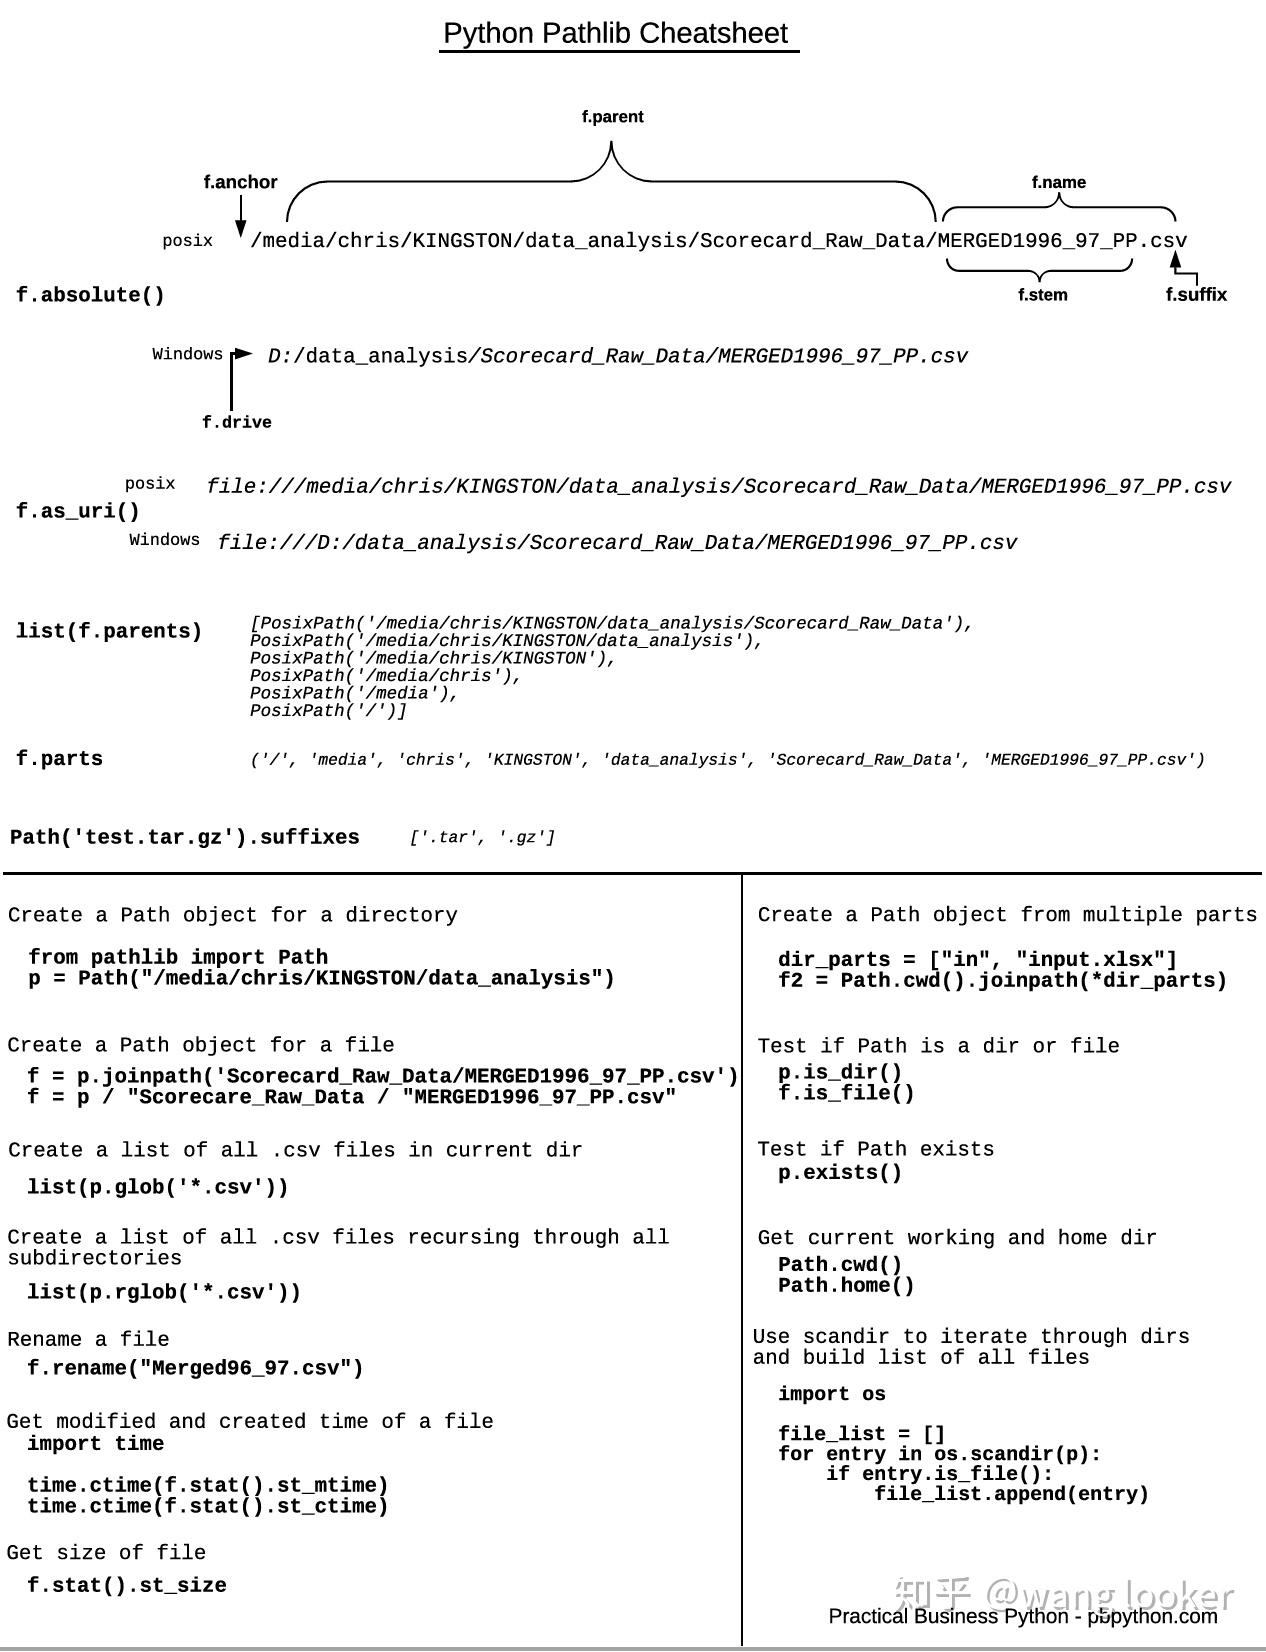

# Method Example

## Get path

### Get current workspace path

This path is not the real project path. It indicates where your program is running.(工作目录是在哪个目录下运行你的程序，不是项目目录。)

In [3]:
# return a path class

import pathlib

workspace = pathlib.Path.cwd()
print(workspace, type(workspace))

e:\git\learning\python <class 'pathlib.WindowsPath'>


### Get USER HOME
Return a path class object, you can get home path for current user.

In [5]:
from pathlib import Path

user_home = Path.home()
print(user_home, type(user_home))

C:\Users\Lenovo <class 'pathlib.WindowsPath'>


### Get a path of the file's location
Return a path of the file's location.

If it is running in a IDE, it will display the absolute path. But, it is running in CMD, it just get a relative path of current workspace. 
`pathlib.Path()` returns a relative path, if adds a  `resolve()` at the end.

So, you can use `resolve()` to transform it to a absolute path.

You will get error if it runs in jupyter.


In [8]:
import pathlib

file_path = pathlib.Path(__file__).resolve()
print(file_path, type(file_path))

NameError: name '__file__' is not defined

### Using `resolve()` to get a absolute path

In [13]:
import pathlib

the_path = pathlib.Path('test.py')
the_absolute_path = pathlib.Path('test.py').resolve()
print(the_path)
print(the_absolute_path)

test.py
E:\git\learning\python\test.py


### Get file state

You can fetch states of a file. It includes size, creating timestamp, modifying timestamp and so on.


In [17]:
import pathlib

file = pathlib.Path('test.py')

print(f'State of file: {file.stat()}')
print(f'Size is {file.stat().st_size}')
print(f'Creating time is {file.stat().st_ctime}')

State of file: os.stat_result(st_mode=33206, st_ino=76279718688606721, st_dev=3939315175, st_nlink=1, st_uid=0, st_gid=0, st_size=9403, st_atime=1732180564, st_mtime=1732180563, st_ctime=1720693348)
Size is 9403
Creating time is 1720693348.9898853


In [28]:
# find the last modify file
import pathlib

# catch parent path of the file
file_path = pathlib.Path('test.py').resolve().parent

# get max modify timestamp
files_modify_timestamp = max((i.stat().st_mtime, i) for i in file_path.iterdir() if i.is_file())
print(files_modify_timestamp)

# get max modify timestamp
# files = []
# for i in file_path.iterdir():
#     if i.is_file():
#         files.append((i.stat().st_mtime, i))
# print(max(files))


(1732186741.6978862, WindowsPath('E:/git/learning/python/About_path.ipynb'))


## Find each part of a path

if a file path is `E:/git/a.txt'`
1. `.name` : file name (includes file suffix), e.g, `a.txt`. If the target item is a folder, then returns the folder name.
2. `.stem` : file name (excludes file suffix), e.g, `a`.
3. `.suffix` : file extension, e.g, `txt`.
4. `.parent` : parent folder, e.g, `E:/git/`, equal to `cd ..`.
5. `.anchor`: an anchor of a path, e.g, `E:/` or `/`.



In [29]:
import pathlib

file_path = pathlib.Path('test.py').resolve()

print(f'File path is : {file_path}')
print(f'File whole name is : {file_path.name}')
print(f'File name is : {file_path.stem}')
print(f'File suffix is : {file_path.suffix}')
print(f'Parent path is : {file_path.parent}')
print(f'Anchor is : {file_path.anchor}')

File path is : E:\git\learning\python\test.py
File whole name is : test.py
File name is : test
File suffix is : .py
Parent path is : E:\git\learning\python
Anchor is : E:\


### Fetch parent paths

Save in a list.

In [32]:
import pathlib

the_file = pathlib.Path('test.py').resolve()
parents_path = the_file.parents
print(f'All the parent path: {list(parents_path)}')

All the parent path: [WindowsPath('E:/git/learning/python'), WindowsPath('E:/git/learning'), WindowsPath('E:/git'), WindowsPath('E:/')]


### Child paths

You can use `file_path.iterdir()` to scan child paths.

You can use `is_dir()` and `is_file()` to determine if target item is file or folder.

In [36]:
import pathlib

# fetch current workspace
which_path = pathlib.Path.cwd()
print(f'Workspace is : {which_path}')

# get all items under the current workspace
path_contents = [i for i in which_path.iterdir()]
print(f'Workspace includes : {path_contents}')

# pick up folders
folders  = [i for i in which_path.iterdir() if i.is_dir()]
print(f'Workspace includes folders : {folders}')

# pick up files
files = [i for i in which_path.iterdir() if i.is_file()]
print(f'workspace includes files: {files}')


Workspace is : e:\git\learning\python
Workspace includes : [WindowsPath('e:/git/learning/python/.vscode'), WindowsPath('e:/git/learning/python/About_path.ipynb'), WindowsPath('e:/git/learning/python/assert.ipynb'), WindowsPath('e:/git/learning/python/Asyncio.ipynb'), WindowsPath('e:/git/learning/python/CodeNote.ipynb'), WindowsPath('e:/git/learning/python/coding_test.ipynb'), WindowsPath('e:/git/learning/python/condition and loop.ipynb'), WindowsPath('e:/git/learning/python/context manager and while.ipynb'), WindowsPath('e:/git/learning/python/Coroutines.ipynb'), WindowsPath('e:/git/learning/python/CreateFunction.ipynb'), WindowsPath('e:/git/learning/python/Data sctructure of Python.ipynb'), WindowsPath('e:/git/learning/python/data.json'), WindowsPath('e:/git/learning/python/decorators.ipynb'), WindowsPath('e:/git/learning/python/EorroHanding.ipynb'), WindowsPath('e:/git/learning/python/error_message.csv'), WindowsPath('e:/git/learning/python/Futures.ipynb'), WindowsPath('e:/git/learni